# 타이타닉 데이터로 DSL EDA 방법론 세션 예시 코드를 작성하는 과정입니다.

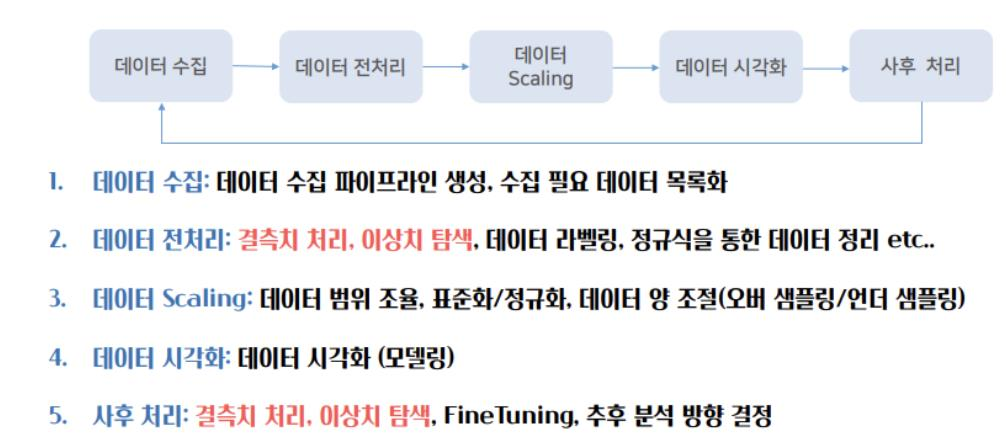

우리의 목적 : 타이타닉 탑승자의 인구통계학적 분석

이에 따른 타이타닉 사의 액션 플랜 제시



필요한 데이터 : 타이타닉 탑승자 데이터 / 크롤링은 일단 진행하지 않겠다. 

## 데이터 불러오기

In [1]:
import pandas as pd

In [ ]:
#마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/titanic/train.csv')
test = pd.read_csv('/content/drive/MyDrive/titanic/test.csv')

# EDA : 

데이터의 형태, 자료형을 분석하자.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
print(train.info())
print("-"*36)
print(test.info())
print("-"*36)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenge



0.	PassengerId	
1.	Survived	생존여부
2.	Pclass	티켓 등급
3.	Name	이름
4.	Sex	성별
5.	Age	나이
6.	SibSp	타이타닉호에 탑승한 형제/배우자 수
7.	Parch	타이타닉호에 탑승한 부모/자녀 수
8.	Ticket	티켓 번호
9.	Fare	여객 요금
10.	Cabin	객실 번호
11.	Embarked	승선항

목적에 따라 필요한 데이터를 취사하자. 

인구생태학적 분포를 알아보는 데 있어 필요한 정보는 :

성별, 나이, 형제/배우자 수와 부모/자녀 수이다. 

추가적으로 :

여객 요금과 티켓 등급 등의 정보로 가정의 재무적인 부분을 생각해볼 수 있을 것이다.

In [ ]:
#자료 생김새 파악
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#데이터의 형태 살펴보기
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [ ]:
#데이터의 결측치 살펴보기
train.isna().sum()
#train데이터는 Age, Cabin, Embarked에 결측치가 존재합니다.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
test.isna().sum()
#test데이터는 Age, Cabin, Fare에 결측치가 존재합니다. 

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
#취사 완료
df_train = train[['Pclass','Sex', 'Age', 'SibSp',
       'Parch','Fare' ]]
df_test = test[['Pclass','Sex', 'Age', 'SibSp',
       'Parch','Fare' ]]

In [ ]:
# 분석 대상이 되는 Age 항에 대해 결측치를 보간해보자!

# 1. 평균으로 보간
df_train = df_train.fillna(df_train.mean())
df_test = df_test.fillna(df_test.mean())

df_test.isna().sum()

<ipython-input-11-5b457f7920b2>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_train = df_train.fillna(df_train.mean())
<ipython-input-11-5b457f7920b2>:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_test = df_test.fillna(df_test.mean())


Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [ ]:
# 2. 다른 데이터 항이 비슷한 행의 값을 가져와서 보간

# KNN 임퓨터 사용 보간 시 자료형은 int / float 여야 함.
## 라벨인코더로 성별 자료의 자료형 바꿔주겠다.

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

encoder.fit(train['Sex'])
labels_1 = encoder.transform(train['Sex'])


encoder.fit(test['Sex'])
labels_2 = encoder.transform(test['Sex'])


train['l_sex'] = labels_1
test['l_sex'] = labels_2

In [ ]:
## either not using label encoder
train1 = train
test1 = test

train1['Sex'] = train1['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
test1['Sex'] = test1['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

filled_train = train[['Pclass','Sex', 'Age', 'SibSp',
       'Parch','Fare' ]]
filled_test = test[['Pclass','Sex', 'Age', 'SibSp',
       'Parch','Fare' ]]

In [ ]:
filled_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    int64  
 2   Age     714 non-null    float64
 3   SibSp   891 non-null    int64  
 4   Parch   891 non-null    int64  
 5   Fare    891 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 41.9 KB


In [ ]:
from sklearn.impute import KNNImputer

df_train = train[['Pclass','Sex', 'Age', 'SibSp',
       'Parch','Fare' ]]
df_test = test[['Pclass','Sex', 'Age', 'SibSp',
       'Parch','Fare' ]]

imputer=KNNImputer(n_neighbors=5)
filled_train=imputer.fit_transform(df_train)
filled_test=imputer.fit_transform(df_test)

filled_train=pd.DataFrame(filled_train, columns=df_train.columns)
filled_test=pd.DataFrame(filled_test, columns=df_test.columns)


# 자료형으로 데이터 분리(Scaling)

In [ ]:
category_f = ['Pclass', 'Sex']

numeric_f  = list(set(filled_train.columns) - set(category_f) )
numeric_f  = np.sort(numeric_f)

## 일변량 / 비시각화 분석 EX) describe 함수, .value_counts()

In [ ]:
for col in numeric_f:
  print(filled_train[col].describe())

count    891.000000
mean      29.832254
std       13.426116
min        0.420000
25%       22.000000
50%       28.000000
75%       37.000000
max       80.000000
Name: Age, dtype: float64
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64
count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64
count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64


In [ ]:
filled_train.SibSp.value_counts()

0.0    608
1.0    209
2.0     28
4.0     18
3.0     16
8.0      7
5.0      5
Name: SibSp, dtype: int64

## 일변량 / 시각화 분석  EX) Histogram

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


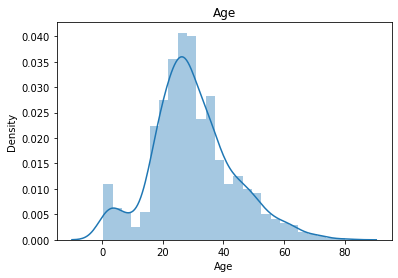

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


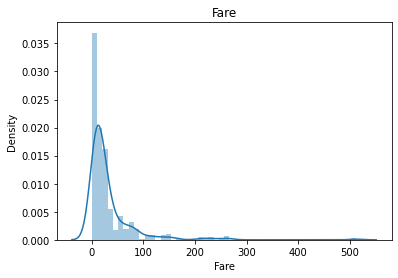

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


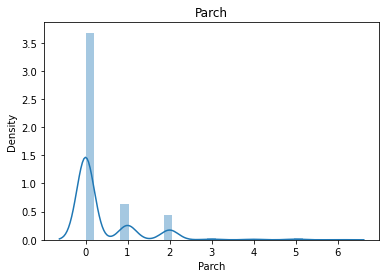

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


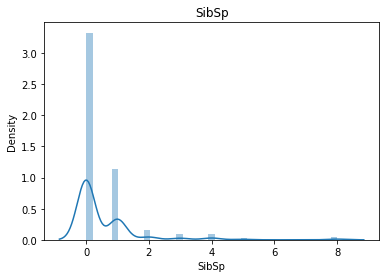

In [ ]:
import scipy.stats as stats

for col in numeric_f:
    sns.distplot(filled_train.loc[filled_train[col].notnull(), col])
    plt.title(col)
    plt.show()

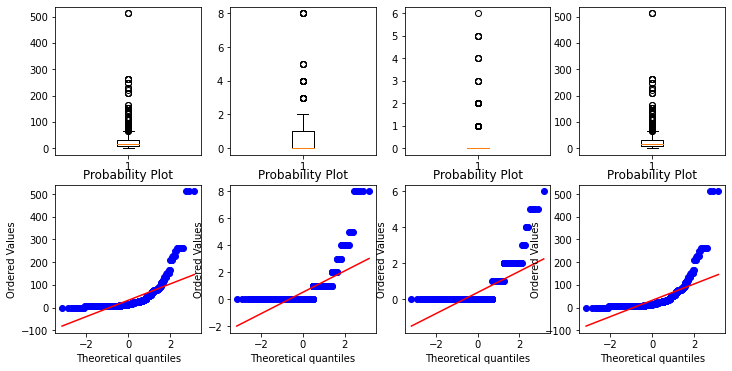

In [ ]:
from scipy.stats import probplot #for qq plot
f, axes = plt.subplots(2, 4, figsize=(12, 6))
Age = np.array(filled_train['Age'])
Sib = np.array(filled_train['SibSp'])
Par = np.array(filled_train['Parch'])
Fare = np.array(filled_train['Fare'])
axes[0][0].boxplot(Age)
probplot(Age, plot=axes[1][0]) #scipy.stats.probplot
axes[0][1].boxplot(Sib)
probplot(Sib, plot=axes[1][1]) #scipy.stats.probplot
axes[0][2].boxplot(Par)
probplot(Par, plot=axes[1][2]) 
axes[0][3].boxplot(Age)
probplot(Fare, plot=axes[1][3]) #scipy.stats.probplot

plt.show()    

다변량 / 비시각화 분석 EX) cross tabulation

In [ ]:
##뭔가 잘못된 자료형
pd.crosstab(filled_train['Age'], filled_train['Fare'], normalize = 'index') 

Fare,0.0000,4.0125,5.0000,6.2375,6.4375,6.4500,6.4958,6.7500,6.8583,6.9500,...,153.4625,164.8667,211.3375,211.5000,221.7792,227.5250,247.5208,262.3750,263.0000,512.3292
Age,,,,,,,,,,,,,,,,,,,,,
0.42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
pd.crosstab(filled_train['Sex'], filled_train['Pclass'], normalize = 'index', margins = True) 

Pclass,1.0,2.0,3.0
Sex,,,
0.0,0.299363,0.242038,0.458599
1.0,0.211438,0.187175,0.601386
All,0.242424,0.206510,0.551066


여자 = 0번 남자 = 1번

3등석 비율은 남자가 높다 : 다양한 계층 남자 탔네!
1등석 비율 여자가 높고.
여기서 그칠까?

In [ ]:
pd.crosstab(filled_train['Sex'], filled_train['Pclass'], normalize = 'all', margins = True) 

Pclass,1.0,2.0,3.0,All
Sex,,,,
0.0,0.105499,0.085297,0.161616,0.352413
1.0,0.136925,0.121212,0.389450,0.647587
All,0.242424,0.206510,0.551066,1.000000


숫자를 보니까 여자는 남자보다 절대량이 적네? 부부는 같이 탔다고 설명에 나와있구나.?
남자 혼자 온 승객이 있다는 걸 알 수 있고, 그 비율이 최소 30% 있었네?

여자 혼자 온 승객은 얼마나 되었을까요??



애 있는 사람 비율 확인



In [ ]:
pd.crosstab(filled_train['Sex'], filled_train['SibSp'], normalize = 'all', margins = True) 

SibSp,0.0,1.0,2.0,3.0,4.0,5.0,8.0,All
Sex,,,,,,,,
0.0,0.195286,0.118967,0.014590,0.012346,0.006734,0.001122,0.003367,0.352413
1.0,0.487093,0.115600,0.016835,0.005612,0.013468,0.004489,0.004489,0.647587
All,0.682379,0.234568,0.031425,0.017957,0.020202,0.005612,0.007856,1.000000


정보를 조합해볼까요? 
1. 여자는 80퍼가 엄마다
2. 남자는 50퍼만 아빠다
3. 남녀 절대량 비율은 6.5:3.5
4. 3.5*0.8 = 2.8 
5. 6.5*0.5 = 3.25
6. 계산을 해보니 남자 혼자 온게 대략 30퍼, 가족 단위로 온 게 약 60퍼. 즉, 타이타닉에 탑승한 건 기혼자 부부가 많다고 생각할 수 있고, 특히나 1등석, 2등석에서 이런 현상이 잘 일어난다고 생각해볼 수 있겠네요.

다변량 / 시각화 분석 EX) scatterplot / heatmap

          Pclass     l_sex       Age     SibSp     Parch      Fare
Pclass  1.000000  0.131900 -0.386227  0.083081  0.018443 -0.549500
l_sex   0.131900  1.000000  0.110802 -0.114631 -0.245489 -0.182333
Age    -0.386227  0.110802  1.000000 -0.209747 -0.182487  0.103146
SibSp   0.083081 -0.114631 -0.209747  1.000000  0.414838  0.159651
Parch   0.018443 -0.245489 -0.182487  0.414838  1.000000  0.216225
Fare   -0.549500 -0.182333  0.103146  0.159651  0.216225  1.000000


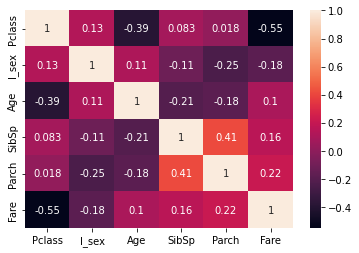

In [ ]:
df_corr = filled_train.corr()
print(df_corr)
sns.heatmap(df_corr, annot=True)
plt.show()

상관계수의 절댓값이 0.4 이상이면 유의하다고 많은 학문에서 말하는데, 운임과 좌석, 나이와 좌석, 탑승한 부모와 자식 간의 관계에서 상관계수를 찾아볼 수 있습니다. 이렇게 당연한 결과들에서는 유의미한 정보를 끌어내기 어렵습니다. 여러가지 생각을 데이터를 보면서 해보시길 바랍니다.

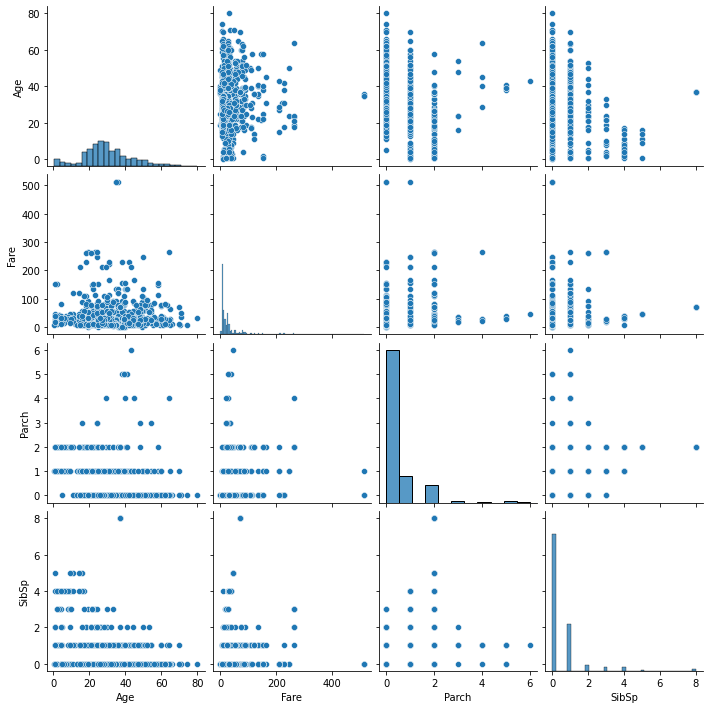

In [ ]:
sns.pairplot(filled_train[list(numeric_f)], 
             x_vars=numeric_f, y_vars=numeric_f)
plt.show()

## 전처리, Scaling 추가 설명

### 이론 설명
언더 샘플링/ 오버 샘플링
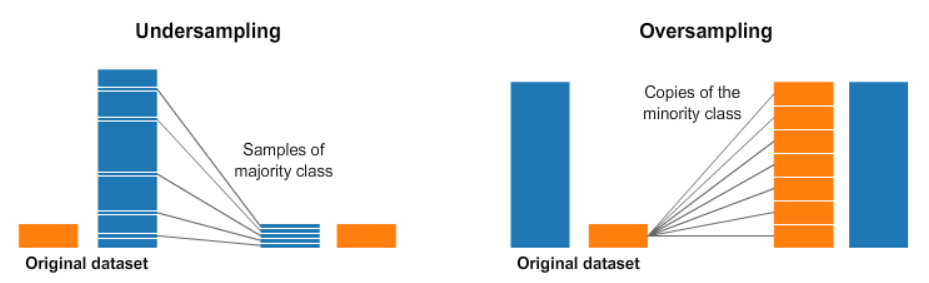

### 모델의 균형적 학습을 위해 하는 전처리.

In [ ]:
# imbalanced-learn 패키지
from imlearn.over_sampling import SMOTE

# 검증 데이터나 테스트 데이터가 아닌 학습데이터에서만 오버샘플링 사용할 것
smote = SMOTE(random_state=11)
X_train_over, y_train_over = smote.fit_sample(X_train, y_train)

## 정규화 / 표준화

정규화 : -1 ~ 1 사이의 값으로 변환

표준화 : 평균이 0이고 표준편차가 1인 값으로 변환

모델 사용 시 정규화 / 표준화로 칼럼 별 모델에 미치는 영향을 통일하기 위함.



In [ ]:
def normalize(x):
  return (x-x.min())/(x.max()-x.min())
  
def standardscaler(x):
  return (x-x.mean())/x.std()

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train[['Fare']])
train_fare = ss.transform(train[['Fare']])
test_fare = ss.transform(test[['Fare']])